## Topics Covered
1) Linear Regression
2) Ridge and Lasso 
3) Logistic Regression
4) Decision Tree 

#House Pricing DataSet

In [3]:
from sklearn.datasets import fetch_california_housing

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = fetch_california_housing()

In [6]:
type(df)

sklearn.utils._bunch.Bunch

In [8]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
print(dataset.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [9]:
dataset["Price"]= df.target

In [10]:
#Price is dependent feature for linear regression
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
## Dividing the dataset into independent and dependent Features
x = dataset.iloc[:,:-1] ##independent features
y = dataset.iloc[:,-1] ##dependent feature

In [66]:
from sklearn.model_selection import train_test_split
#33% for test and 67% for train
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=42)


In [ ]:
#testing data is for evaluation and trianing data is for learning 

In [18]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score #Taking different for training and testing

lin_reg = LinearRegression()
mse= cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
print(mse)
mean_mse = np.mean(mse)
print(mean_mse)
lin_reg.fit(x,y)

[-0.54099828 -0.49871687 -0.50480739 -0.5200183  -0.55070903]
-0.5230499763383931


LinearRegression()

In [17]:
predictions  = lin_reg.predict(x)
predictions
#cost function should be as lower as it can 

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

In [ ]:
#Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#hyper parameter tuning
ridge = Ridge()

params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [21]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-0.5230499763383933


In [ ]:
#Lasso Regression

Note: Take value which is closer to zero because we have used neg_mean_squared_error

In [60]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#hyper parameter tuning
lasso = Lasso()
# Increase max_iter to help convergence
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(X_train,y_train)

In [25]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.5230499762350409


In [30]:
y_pred=lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
r2

0.33957426835773474

In [ ]:
#Logistic Regression

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.datasets import load_breast_cancer
df =  load_breast_cancer()
#independent Features
X = pd.DataFrame(df["data"],columns=df["feature_names"])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
#dependent features
y=pd.DataFrame(df["target"],columns=["target"])

In [40]:
y.value_counts()
## It is a Balanced dataset 

target
1         357
0         212
Name: count, dtype: int64

In [ ]:
#l1 norm and l2 norm are also present in logistic regression

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)
params=[{"C":[1,5,10]},{"max_iter":[100,150]}]

In [45]:
model1 = LogisticRegression(C=100,max_iter=100)

In [58]:
model = GridSearchCV(model1,param_grid=params,scoring="f1")
#f1 scoring is nothing but performance metrics
model.fit(X_train,y_train)

In [48]:
model.best_params_
model.best_score_

0.9558624887109136

In [50]:
y_pred = model.predict(X_test)
#predict = 1 if sigmoid output ≥ 0.5 else 0

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
confusion_matrix(y_pred,y_test)

array([[ 64,   3],
       [  3, 118]], dtype=int64)

In [56]:
accuracy_score(y_test,y_pred)

0.9680851063829787

In [57]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96        67\n           1       0.98      0.98      0.98       121\n\n    accuracy                           0.97       188\n   macro avg       0.97      0.97      0.97       188\nweighted avg       0.97      0.97      0.97       188\n'

In [ ]:
#Decision Tree

In [1]:
from sklearn.datasets import load_iris

In [11]:
iris=load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
# iris.data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
classifier = DecisionTreeClassifier()
classifier.fit(iris.data,iris.target)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

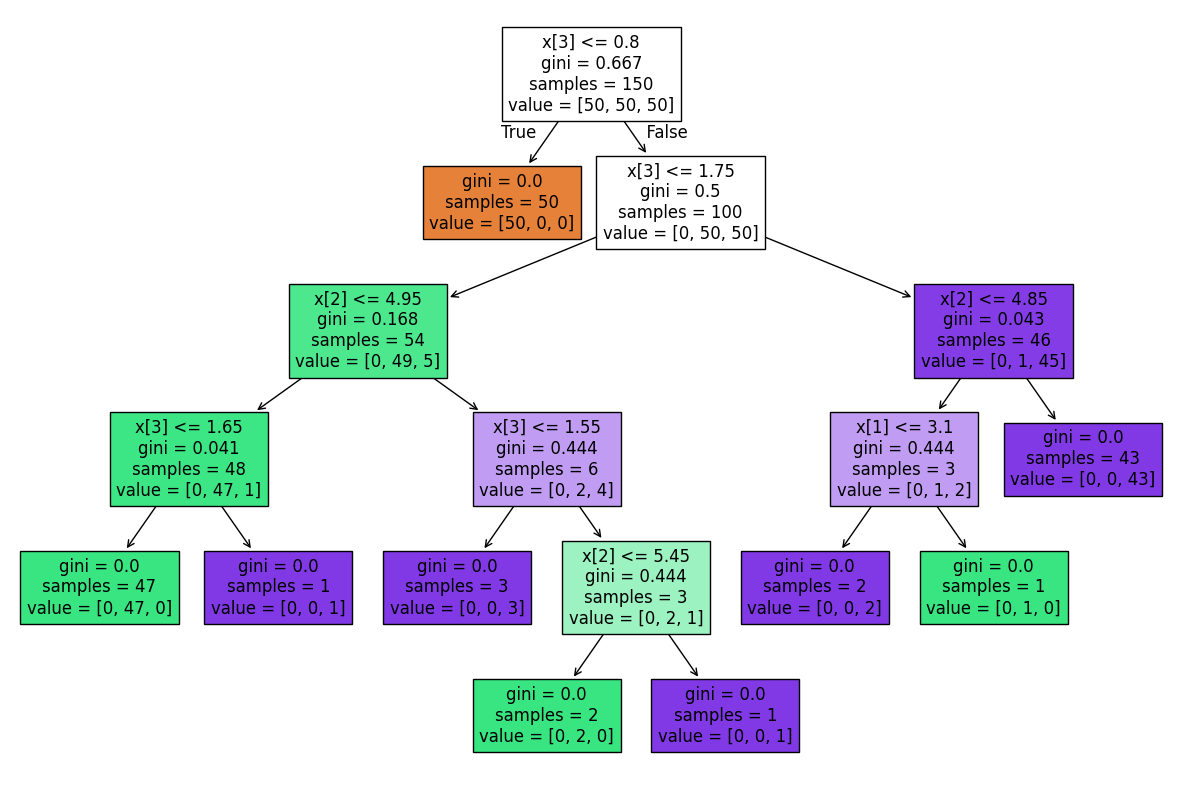

In [15]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)